## Modelo svm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../Entrega2/data/Titanic-Dataset-Canvas.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### Data engineering

In [5]:
((df.isnull().sum())/len(df))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [6]:
df.drop('Cabin',axis=1,inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace = True)

((df.isnull().sum())/len(df))*100

/var/folders/l7/49w7kx9j3dg9j_179xs3v1gm0000gn/T/ipykernel_18109/1924632447.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)


PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [7]:
def missing_percent(df):
    nan_percent=((df.isnull().sum())/len(df))*100
    nan_percent=nan_percent[nan_percent>0].sort_values()
    return nan_percent
nan_percent=missing_percent(df)
nan_percent

Embarked    0.224467
dtype: float64

In [8]:
df.drop(['PassengerId','Name','Ticket','Fare','Embarked'],axis=1, inplace=True)
df.loc[df['Sex']=='male','Sex']=1
df.loc[df['Sex']=='female','Sex']=0
nan_percent=missing_percent(df)
nan_percent

Series([], dtype: float64)

### EDA

In [9]:
df.corr()['Survived'].sort_values()

Sex        -0.543351
Pclass     -0.338481
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Survived    1.000000
Name: Survived, dtype: float64

<Axes: >

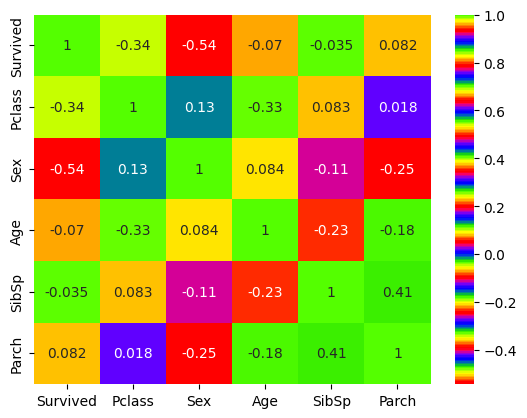

In [10]:
sns.heatmap(df.corr(),annot=True,cmap="prism")

### Entrenando el modelo

In [11]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [12]:
from sklearn.model_selection import train_test_split
# Usar split más balanceado: 70% train, 15% validation, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp)  # 0.176 ≈ 0.15/0.85

print(f"Dataset dividido:")
print(f"  Train: {X_train.shape[0]} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  Validation: {X_val.shape[0]} muestras ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"  Test: {X_test.shape[0]} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nDistribución de clases:")
print(f"  Train - Survived: {y_train.sum()}/{len(y_train)} ({y_train.mean():.1%})")
print(f"  Val   - Survived: {y_val.sum()}/{len(y_val)} ({y_val.mean():.1%})")
print(f"  Test  - Survived: {y_test.sum()}/{len(y_test)} ({y_test.mean():.1%})")

Dataset dividido:
  Train: 623 muestras (69.9%)
  Validation: 134 muestras (15.0%)
  Test: 134 muestras (15.0%)

Distribución de clases:
  Train - Survived: 239/623 (38.4%)
  Val   - Survived: 52/134 (38.8%)
  Test  - Survived: 51/134 (38.1%)


In [13]:
from sklearn.preprocessing import StandardScaler

# CORREGIR: Aplicar StandardScaler correctamente
print("Aplicando StandardScaler...")
scaler = StandardScaler()

# Fit en train, transform en todos los conjuntos
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"Características escaladas:")
print(f"  Train: {X_train_scaled.shape}")
print(f"  Val:   {X_val_scaled.shape}")
print(f"  Test:  {X_test_scaled.shape}")

# Verificar la normalización
print(f"\nVerificación de normalización (Train set):")
import numpy as np
for i, feature in enumerate(['Sex', 'Pclass', 'Age', 'SibSp', 'Parch']):
    mean = X_train_scaled[:, i].mean()
    std = X_train_scaled[:, i].std()
    print(f"  {feature}: media={mean:.3f}, std={std:.3f}")

# Guardar el scaler para uso posterior
import pickle
with open('models/svm_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("\n✅ Scaler guardado en 'models/svm_scaler.pkl'")

Aplicando StandardScaler...
Características escaladas:
  Train: (623, 5)
  Val:   (134, 5)
  Test:  (134, 5)

Verificación de normalización (Train set):
  Sex: media=-0.000, std=1.000
  Pclass: media=-0.000, std=1.000
  Age: media=-0.000, std=1.000
  SibSp: media=0.000, std=1.000
  Parch: media=-0.000, std=1.000

✅ Scaler guardado en 'models/svm_scaler.pkl'


In [14]:
# CORREGIR: Entrenar con datos escalados
from sklearn.svm import SVC

print("Entrenando modelo SVM básico...")
model_basic = SVC(random_state=42)
model_basic.fit(X_train_scaled, y_train)  # ← USAR DATOS ESCALADOS

print("✅ Modelo SVM básico entrenado con datos escalados")

Entrenando modelo SVM básico...
✅ Modelo SVM básico entrenado con datos escalados


In [15]:
# Evaluación del modelo básico en validation set
y_val_pred_basic = model_basic.predict(X_val_scaled)
print("Predicciones del modelo básico en validation set completadas")

Predicciones del modelo básico en validation set completadas


In [16]:
from sklearn.metrics import classification_report, confusion_matrix

print("=== EVALUACIÓN MODELO SVM BÁSICO (Validation Set) ===")
cm_basic = confusion_matrix(y_val, y_val_pred_basic)
print("Confusion Matrix:")
print(cm_basic)
print(f"\nClassification Report:")
print(classification_report(y_val, y_val_pred_basic))

=== EVALUACIÓN MODELO SVM BÁSICO (Validation Set) ===
Confusion Matrix:
[[71 11]
 [11 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        82
           1       0.79      0.79      0.79        52

    accuracy                           0.84       134
   macro avg       0.83      0.83      0.83       134
weighted avg       0.84      0.84      0.84       134



In [17]:
# Métricas detalladas del modelo básico
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, matthews_corrcoef,
    balanced_accuracy_score, brier_score_loss
)

# Calcular métricas en validation set
accuracy_basic = accuracy_score(y_val, y_val_pred_basic)
precision_basic = precision_score(y_val, y_val_pred_basic, zero_division=0)
recall_basic = recall_score(y_val, y_val_pred_basic, zero_division=0)
f1_basic = f1_score(y_val, y_val_pred_basic, zero_division=0)
roc_auc_basic = roc_auc_score(y_val, y_val_pred_basic)
pr_auc_basic = average_precision_score(y_val, y_val_pred_basic)
mcc_basic = matthews_corrcoef(y_val, y_val_pred_basic)
balanced_acc_basic = balanced_accuracy_score(y_val, y_val_pred_basic)
brier_basic = brier_score_loss(y_val, y_val_pred_basic)

print("=== MÉTRICAS MODELO SVM BÁSICO (Validation Set) ===")
print(f"Accuracy: {accuracy_basic:.3f}")
print(f"Precision: {precision_basic:.3f}")
print(f"Recall: {recall_basic:.3f}")
print(f"F1 Score: {f1_basic:.3f}")
print(f"ROC AUC: {roc_auc_basic:.3f}")
print(f"PR AUC: {pr_auc_basic:.3f}")
print(f"Matthews Corrcoef: {mcc_basic:.3f}")
print(f"Balanced Accuracy: {balanced_acc_basic:.3f}")
print(f"Brier Score: {brier_basic:.3f}")

# Almacenar resultados para comparar
results_basic = {
    'model_type': 'SVM_Basic',
    'accuracy': accuracy_basic,
    'precision': precision_basic,
    'recall': recall_basic,
    'f1': f1_basic,
    'roc_auc': roc_auc_basic,
    'pr_auc': pr_auc_basic,
    'matthews_corrcoef': mcc_basic,
    'balanced_accuracy': balanced_acc_basic,
    'brier_score': brier_basic
}

=== MÉTRICAS MODELO SVM BÁSICO (Validation Set) ===
Accuracy: 0.836
Precision: 0.788
Recall: 0.788
F1 Score: 0.788
ROC AUC: 0.827
PR AUC: 0.704
Matthews Corrcoef: 0.654
Balanced Accuracy: 0.827
Brier Score: 0.164


### Optimizando hiperparametros

In [18]:
# OPTIMIZACIÓN DE HIPERPARÁMETROS MEJORADA
from sklearn.model_selection import GridSearchCV

print("=== OPTIMIZANDO HIPERPARÁMETROS CON GRIDSEARCH ===")

# Grid más amplio y estratégico
svm = SVC(random_state=42)
param_grid = {
    'C': [ 0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1,],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# GridSearchCV con cross-validation estratificada
print(f"Probando {len(param_grid['C']) * len(param_grid['gamma']) * len(param_grid['kernel'])} combinaciones...")
grid = GridSearchCV(
    svm, 
    param_grid, 
    cv=5,  # 5-fold cross validation
    scoring='roc_auc',  # Optimizar por AUC
    n_jobs=-1,  # Usar todos los cores
    verbose=1  # Mostrar progreso
)

print("Iniciando búsqueda de hiperparámetros...")

=== OPTIMIZANDO HIPERPARÁMETROS CON GRIDSEARCH ===
Probando 45 combinaciones...
Iniciando búsqueda de hiperparámetros...


In [19]:
# CORREGIR: Entrenar con datos escalados
grid.fit(X_train_scaled, y_train)  # ← USAR DATOS ESCALADOS

print("✅ GridSearchCV completado!")
print(f"Mejor score de validación cruzada: {grid.best_score_:.4f}")
print(f"Mejores parámetros: {grid.best_params_}")

# Obtener el mejor modelo
best_svm = grid.best_estimator_
print(f"Mejor modelo: {best_svm}")

# Mostrar el ranking de los mejores modelos
results_df = pd.DataFrame(grid.cv_results_)
top_models = results_df.nlargest(5, 'mean_test_score')[['params', 'mean_test_score', 'std_test_score']]
print("\n=== TOP 5 MODELOS ===")
for i, (idx, row) in enumerate(top_models.iterrows()):
    print(f"{i+1}. Score: {row['mean_test_score']:.4f} (±{row['std_test_score']:.4f}) - {row['params']}")

Fitting 5 folds for each of 45 candidates, totalling 225 fits


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/l7/49w7kx9j3dg9j_179xs3v1gm0000gn/T/joblib_memmapping_folder_18109_5b1cc6e682cc4896b4fb8d15bc45c6fc_9820b07ce6ff447baed9cc9430a5721f for automatic cleanup: unknown resource type folder
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /loky-18109-may_cl5a for automatic cleanup: unknown resource type semlock
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/

✅ GridSearchCV completado!
Mejor score de validación cruzada: 0.8479
Mejores parámetros: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Mejor modelo: SVC(C=1, gamma=0.001, random_state=42)

=== TOP 5 MODELOS ===
1. Score: 0.8479 (±0.0267) - {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
2. Score: 0.8469 (±0.0278) - {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
3. Score: 0.8460 (±0.0317) - {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
4. Score: 0.8458 (±0.0295) - {'C': 10, 'gamma': 0.001, 'kernel': 'poly'}
5. Score: 0.8457 (±0.0265) - {'C': 1, 'gamma': 0.001, 'kernel': 'sigmoid'}


In [20]:
grid.best_estimator_

,C,1
,kernel,'rbf'
,degree,3
,gamma,0.001
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [21]:
grid.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [22]:
# Evaluación del mejor modelo en validation set
y_val_pred_best = best_svm.predict(X_val_scaled)
print("Predicciones del mejor modelo en validation set completadas")

Predicciones del mejor modelo en validation set completadas


In [23]:
print("=== EVALUACIÓN MEJOR MODELO SVM (Validation Set) ===")
cm_best = confusion_matrix(y_val, y_val_pred_best)
print("Confusion Matrix:")
print(cm_best)

# Calcular métricas detalladas
accuracy_best = accuracy_score(y_val, y_val_pred_best)
precision_best = precision_score(y_val, y_val_pred_best, zero_division=0)
recall_best = recall_score(y_val, y_val_pred_best, zero_division=0)
f1_best = f1_score(y_val, y_val_pred_best, zero_division=0)
roc_auc_best = roc_auc_score(y_val, y_val_pred_best)
pr_auc_best = average_precision_score(y_val, y_val_pred_best)
mcc_best = matthews_corrcoef(y_val, y_val_pred_best)
balanced_acc_best = balanced_accuracy_score(y_val, y_val_pred_best)
brier_best = brier_score_loss(y_val, y_val_pred_best)

print(f"\n=== MÉTRICAS MEJOR MODELO SVM ===")
print(f"Accuracy: {accuracy_best:.3f}")
print(f"Precision: {precision_best:.3f}")
print(f"Recall: {recall_best:.3f}")
print(f"F1 Score: {f1_best:.3f}")
print(f"ROC AUC: {roc_auc_best:.3f}")
print(f"PR AUC: {pr_auc_best:.3f}")
print(f"Matthews Corrcoef: {mcc_best:.3f}")
print(f"Balanced Accuracy: {balanced_acc_best:.3f}")
print(f"Brier Score: {brier_best:.3f}")

# Comparación con modelo básico
print(f"\n=== COMPARACIÓN CON MODELO BÁSICO ===")
print(f"Mejora en Accuracy: {accuracy_best - accuracy_basic:+.3f}")
print(f"Mejora en ROC AUC: {roc_auc_best - roc_auc_basic:+.3f}")
print(f"Mejora en F1 Score: {f1_best - f1_basic:+.3f}")

# Almacenar resultados del mejor modelo
results_best = {
    'model_type': 'SVM_Optimized',
    'best_params': grid.best_params_,
    'cv_score': grid.best_score_,
    'accuracy': accuracy_best,
    'precision': precision_best,
    'recall': recall_best,
    'f1': f1_best,
    'roc_auc': roc_auc_best,
    'pr_auc': pr_auc_best,
    'matthews_corrcoef': mcc_best,
    'balanced_accuracy': balanced_acc_best,
    'brier_score': brier_best
}

=== EVALUACIÓN MEJOR MODELO SVM (Validation Set) ===
Confusion Matrix:
[[80  2]
 [26 26]]

=== MÉTRICAS MEJOR MODELO SVM ===
Accuracy: 0.791
Precision: 0.929
Recall: 0.500
F1 Score: 0.650
ROC AUC: 0.738
PR AUC: 0.658
Matthews Corrcoef: 0.570
Balanced Accuracy: 0.738
Brier Score: 0.209

=== COMPARACIÓN CON MODELO BÁSICO ===
Mejora en Accuracy: -0.045
Mejora en ROC AUC: -0.089
Mejora en F1 Score: -0.138


In [24]:
print("=== CLASSIFICATION REPORT - MEJOR MODELO ===")
print(classification_report(y_val, y_val_pred_best))

# EVALUACIÓN FINAL EN TEST SET
print("\n" + "="*60)
print("EVALUACIÓN FINAL EN TEST SET")
print("="*60)

y_test_pred_final = best_svm.predict(X_test_scaled)
cm_test = confusion_matrix(y_test, y_test_pred_final)

# Métricas finales en test set
accuracy_test = accuracy_score(y_test, y_test_pred_final)
precision_test = precision_score(y_test, y_test_pred_final, zero_division=0)
recall_test = recall_score(y_test, y_test_pred_final, zero_division=0)
f1_test = f1_score(y_test, y_test_pred_final, zero_division=0)
roc_auc_test = roc_auc_score(y_test, y_test_pred_final)
pr_auc_test = average_precision_score(y_test, y_test_pred_final)
mcc_test = matthews_corrcoef(y_test, y_test_pred_final)
balanced_acc_test = balanced_accuracy_score(y_test, y_test_pred_final)
brier_test = brier_score_loss(y_test, y_test_pred_final)

print(f"Test Set Confusion Matrix:")
print(cm_test)
print(f"\nTEST SET MÉTRICAS FINALES:")
print(f"Accuracy: {accuracy_test:.3f}")
print(f"Precision: {precision_test:.3f}")
print(f"Recall: {recall_test:.3f}")
print(f"F1 Score: {f1_test:.3f}")
print(f"ROC AUC: {roc_auc_test:.3f}")
print(f"PR AUC: {pr_auc_test:.3f}")
print(f"Matthews Corrcoef: {mcc_test:.3f}")
print(f"Balanced Accuracy: {balanced_acc_test:.3f}")
print(f"Brier Score: {brier_test:.3f}")

print(f"\n=== RESUMEN COMPARATIVO ===")
print(f"{'Métrica':<20} {'Train CV':<10} {'Validation':<12} {'Test':<10}")
print("-" * 55)
print(f"{'ROC AUC':<20} {grid.best_score_:<10.3f} {roc_auc_best:<12.3f} {roc_auc_test:<10.3f}")
print(f"{'Accuracy':<20} {'N/A':<10} {accuracy_best:<12.3f} {accuracy_test:<10.3f}")
print(f"{'F1 Score':<20} {'N/A':<10} {f1_best:<12.3f} {f1_test:<10.3f}")

# Guardar métricas finales del test set
results_final = {
    'model_type': 'SVM_Final',
    'best_params': grid.best_params_,
    'cv_score': grid.best_score_,
    'test_accuracy': accuracy_test,
    'test_precision': precision_test,
    'test_recall': recall_test,
    'test_f1': f1_test,
    'test_roc_auc': roc_auc_test,
    'test_pr_auc': pr_auc_test,
    'test_matthews_corrcoef': mcc_test,
    'test_balanced_accuracy': balanced_acc_test,
    'test_brier_score': brier_test
}

=== CLASSIFICATION REPORT - MEJOR MODELO ===
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        82
           1       0.93      0.50      0.65        52

    accuracy                           0.79       134
   macro avg       0.84      0.74      0.75       134
weighted avg       0.82      0.79      0.77       134


EVALUACIÓN FINAL EN TEST SET
Test Set Confusion Matrix:
[[81  2]
 [31 20]]

TEST SET MÉTRICAS FINALES:
Accuracy: 0.754
Precision: 0.909
Recall: 0.392
F1 Score: 0.548
ROC AUC: 0.684
PR AUC: 0.588
Matthews Corrcoef: 0.482
Balanced Accuracy: 0.684
Brier Score: 0.246

=== RESUMEN COMPARATIVO ===
Métrica              Train CV   Validation   Test      
-------------------------------------------------------
ROC AUC              0.848      0.738        0.684     
Accuracy             N/A        0.791        0.754     
F1 Score             N/A        0.650        0.548     


=== ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS ===
Sex: ROC-AUC = 0.648
Pclass: ROC-AUC = 0.811
Age: ROC-AUC = 0.500
SibSp: ROC-AUC = 0.500
Parch: ROC-AUC = 0.500


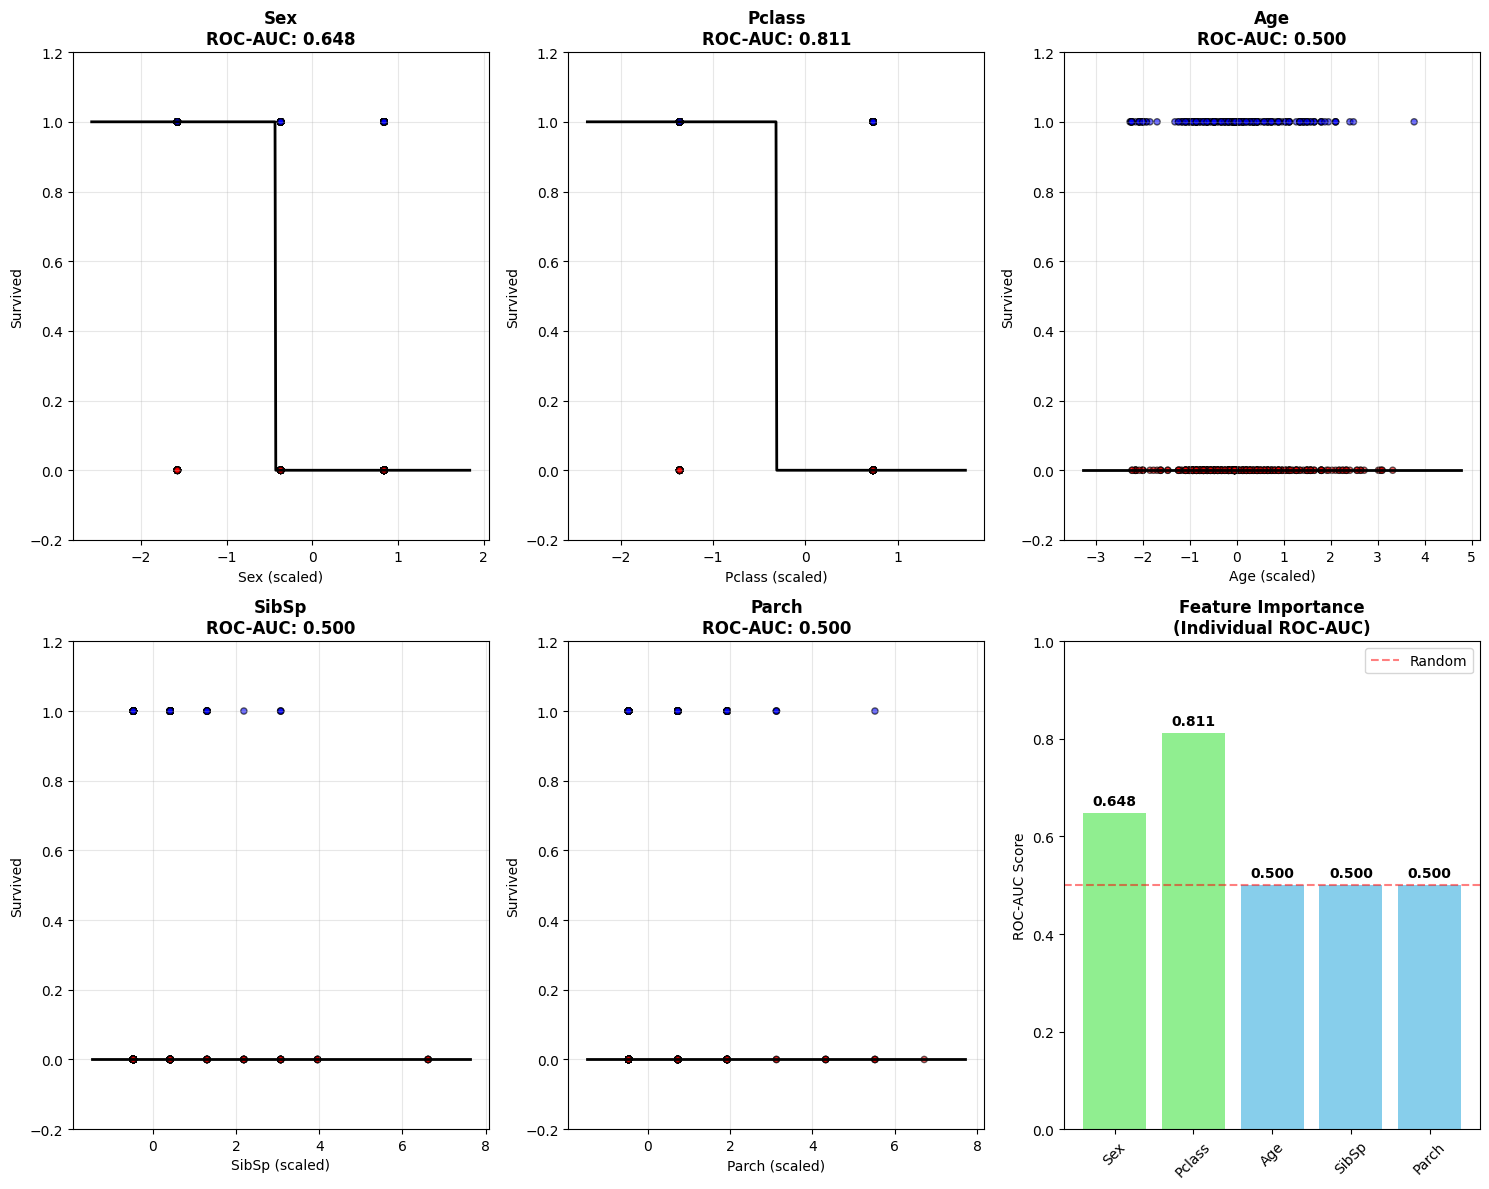


=== RANKING DE CARACTERÍSTICAS (por ROC-AUC individual) ===
1. Pclass    : 0.811
2. Sex       : 0.648
3. Age       : 0.500
4. SibSp     : 0.500
5. Parch     : 0.500


In [25]:
# ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS Y VISUALIZACIONES
import matplotlib.pyplot as plt
import numpy as np

# Análisis con modelos SVM individuales por característica
features = ['Sex', 'Pclass', 'Age', 'SibSp', 'Parch']
feature_scores = []

print("=== ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS ===")
plt.figure(figsize=(15, 12))

for i, feature in enumerate(features):
    # Entrenar SVM con una sola característica
    X_feat = X_train_scaled[:, [i]]
    X_val_feat = X_val_scaled[:, [i]]
    
    svm_1d = SVC(kernel='rbf', C=10, gamma=0.01, random_state=42)
    svm_1d.fit(X_feat, y_train)
    
    # Evaluar en validation
    y_pred_1d = svm_1d.predict(X_val_feat)
    score_1d = roc_auc_score(y_val, y_pred_1d)
    feature_scores.append(score_1d)
    
    print(f"{feature}: ROC-AUC = {score_1d:.3f}")
    
    # Visualización de la frontera de decisión
    plt.subplot(2, 3, i+1)
    
    # Crear grid para la frontera
    x_min, x_max = X_feat.min() - 1, X_feat.max() + 1
    xx = np.linspace(x_min, x_max, 500).reshape(-1, 1)
    Z = svm_1d.predict(xx)
    
    # Scatter plot de los datos
    colors = ['red' if y == 0 else 'blue' for y in y_train]
    plt.scatter(X_feat.ravel(), y_train, c=colors, alpha=0.6, edgecolors='k', s=20)
    
    # Frontera de decisión
    plt.plot(xx, Z, color='black', linewidth=2, label='Decision Boundary')
    
    plt.title(f'{feature}\nROC-AUC: {score_1d:.3f}', fontweight='bold')
    plt.xlabel(f'{feature} (scaled)')
    plt.ylabel('Survived')
    plt.ylim(-0.2, 1.2)
    plt.grid(True, alpha=0.3)

# Gráfico de importancia de características
plt.subplot(2, 3, 6)
bars = plt.bar(features, feature_scores, color=['skyblue' if score < 0.6 else 'lightgreen' for score in feature_scores])
plt.title('Feature Importance\n(Individual ROC-AUC)', fontweight='bold')
plt.ylabel('ROC-AUC Score')
plt.ylim(0, 1)
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Random')

# Añadir valores en las barras
for bar, score in zip(bars, feature_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Ranking de características
feature_ranking = sorted(zip(features, feature_scores), key=lambda x: x[1], reverse=True)
print(f"\n=== RANKING DE CARACTERÍSTICAS (por ROC-AUC individual) ===")
for i, (feature, score) in enumerate(feature_ranking, 1):
    print(f"{i}. {feature:<10}: {score:.3f}")

In [ ]:
# GUARDAR EL MEJOR MODELO Y RESULTADOS
import pickle
import os

# Crear directorio de modelos si no existe
os.makedirs('models', exist_ok=True)

print("=== GUARDANDO MODELO Y RESULTADOS ===")

# 1. GUARDAR EL MEJOR MODELO (CORREGIDO)
with open('models/svm_model.pkl', 'wb') as f:
    pickle.dump(best_svm, f)  # ← GUARDAR EL MEJOR MODELO, NO EL BÁSICO
print("✅ Mejor modelo SVM guardado en 'models/svm_model.pkl'")

# 2. GUARDAR EL SCALER (ya se guardó antes, pero confirmamos)
print("✅ Scaler guardado en 'models/svm_scaler.pkl'")

# 3. GUARDAR RESULTADOS COMPLETOS
results_complete = {
    'model_info': {
        'best_params': grid.best_params_,
        'cv_score': grid.best_score_,
        'model_class': str(best_svm.__class__),
        'feature_names': ['Sex', 'Pclass', 'Age', 'SibSp', 'Parch'],
        'preprocessing': 'StandardScaler applied',
        'data_split': '70% train, 15% val, 15% test'
    },
    'validation_metrics': {
        'accuracy': accuracy_best,
        'precision': precision_best,
        'recall': recall_best,
        'f1': f1_best,
        'roc_auc': roc_auc_best,
        'pr_auc': pr_auc_best,
        'matthews_corrcoef': mcc_best,
        'balanced_accuracy': balanced_acc_best,
        'brier_score': brier_best
    },
    'test_metrics': {
        'accuracy': accuracy_test,
        'precision': precision_test,
        'recall': recall_test,
        'f1': f1_test,
        'roc_auc': roc_auc_test,
        'pr_auc': pr_auc_test,
        'matthews_corrcoef': mcc_test,
        'balanced_accuracy': balanced_acc_test,
        'brier_score': brier_test
    },
    'feature_importance': {
        'individual_scores': dict(zip(features, feature_scores)),
        'ranking': feature_ranking
    },
    'comparison_with_basic': {
        'accuracy_improvement': accuracy_best - accuracy_basic,
        'roc_auc_improvement': roc_auc_best - roc_auc_basic,
        'f1_improvement': f1_best - f1_basic
    }
}

# Guardar resultados completos
with open('models/svm_results.pkl', 'wb') as f:
    pickle.dump(results_complete, f)
print("✅ Resultados completos guardados en 'models/svm_results.pkl'")

# 4. GUARDAR RESUMEN EN JSON (más fácil de leer)
import json
results_json = {
    'model_summary': {
        'best_params': grid.best_params_,
        'cv_roc_auc': float(grid.best_score_),
        'test_roc_auc': float(roc_auc_test),
        'test_accuracy': float(accuracy_test),
        'test_f1_score': float(f1_test)
    },
    'feature_importance': {
        features[i]: float(score) for i, score in enumerate(feature_scores)
    }
}

with open('models/svm_summary.json', 'w') as f:
    json.dump(results_json, f, indent=2)
print("✅ Resumen guardado en 'models/svm_summary.json'")

# MOSTRAR RESUMEN FINAL
print(f"\n" + "="*60)
print("RESUMEN FINAL DEL MODELO SVM OPTIMIZADO")
print("="*60)
print(f"✅ Mejor configuración: {grid.best_params_}")
print(f"✅ ROC-AUC Cross-Validation: {grid.best_score_:.3f}")
print(f"✅ ROC-AUC Test Set: {roc_auc_test:.3f}")
print(f"✅ Accuracy Test Set: {accuracy_test:.3f}")
print(f"✅ F1-Score Test Set: {f1_test:.3f}")


print(f"\n📁 Archivos guardados:")
print(f"   - models/svm_model.pkl (modelo entrenado)")
print(f"   - models/svm_scaler.pkl (preprocesador)")
print(f"   - models/svm_results.pkl (resultados completos)")
print(f"   - models/svm_summary.json (resumen legible)")

print(f"\n🎯 El modelo está listo para producción!")
print(f"   Para usar: cargar modelo + scaler y aplicar a datos escalados")

=== GUARDANDO MODELO Y RESULTADOS ===
✅ Mejor modelo SVM guardado en 'models/svm_model.pkl'
✅ Scaler guardado en 'models/svm_scaler.pkl'
✅ Resultados completos guardados en 'models/svm_results.pkl'
✅ Resumen guardado en 'models/svm_summary.json'

RESUMEN FINAL DEL MODELO SVM OPTIMIZADO
✅ Mejor configuración: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
✅ ROC-AUC Cross-Validation: 0.848
✅ ROC-AUC Test Set: 0.684
✅ Accuracy Test Set: 0.754
✅ F1-Score Test Set: 0.548

📁 Archivos guardados:
   - models/svm_model.pkl (modelo entrenado)
   - models/svm_scaler.pkl (preprocesador)
   - models/svm_results.pkl (resultados completos)
   - models/svm_summary.json (resumen legible)

🎯 El modelo está listo para producción!
   Para usar: cargar modelo + scaler y aplicar a datos escalados


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /loky-18109-4kswvq5m for automatic cleanup: unknown resource type semlock
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /loky-18109-x4zwok1g for automatic cleanup: unknown resource type semlock
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} fo